In [1]:
from sympy import *
import numpy as np
init_printing()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal, ttest_rel
import sklearn.linear_model as lm

## Exercise 1 - Brain

### Scatterplot

In [2]:
brain_data = pd.read_csv('brainweight.txt', delim_whitespace = True)
brain_data.head()

C:\Users\aneas\AppData\Local\Temp\ipykernel_13604\587861714.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  brain_data = pd.read_csv('brainweight.txt', delim_whitespace = True)


,art,body,brain
0,Arctic.fox,3.385,44.5
1,Owl.Monkey,0.480,15.5
2,Mountain.beaver,1.350,8.1
3,Cow,465.000,423.0
4,Gray.wolf,36.330,119.5


In [3]:
body = brain_data[['body']]
brain = brain_data[['brain']]
#body.values

,body
0,3.385
1,0.480
2,1.350
3,465.000
4,36.330
...,...
57,160.000
58,0.900
59,1.620
60,0.104


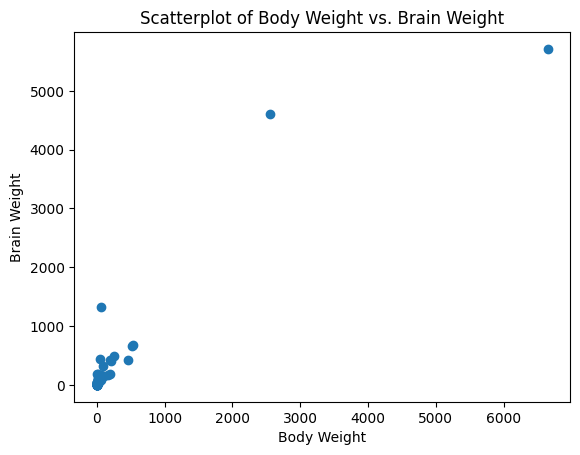

In [4]:
plt.scatter(body, brain)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.title('Scatterplot of Body Weight vs. Brain Weight')
plt.show()

### Scaterplot - log transformed

In [5]:
log_body = np.log(body)
log_brain = np.log(brain)

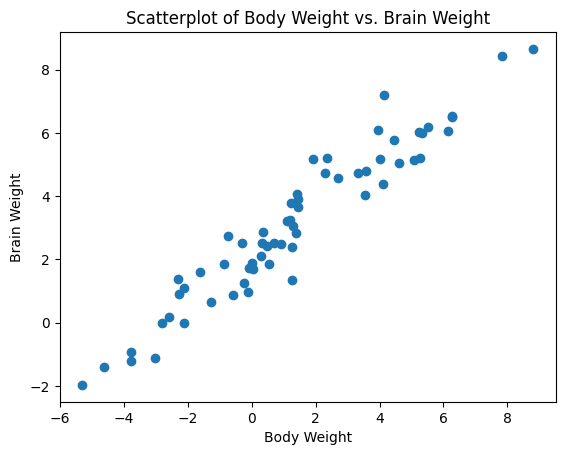

In [6]:
plt.scatter(log_body, log_brain)
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.title('Scatterplot of Body Weight vs. Brain Weight')
plt.show()

### 3. Fitting a regression model

In [7]:
model = lm.LinearRegression()
model.fit(log_body, log_brain)

LinearRegression()

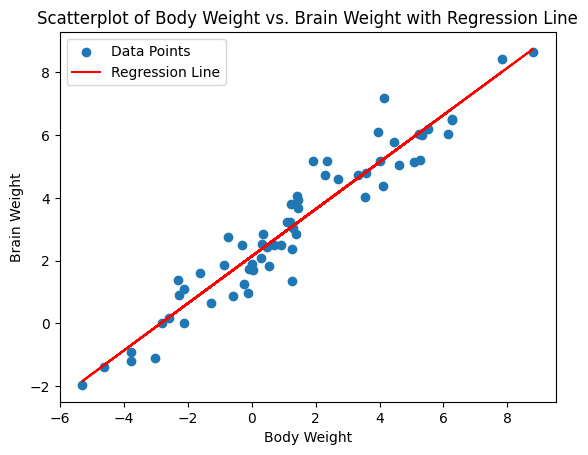

In [8]:
# Getting the regression line values
y_range = model.predict(log_body)

# Creating a scatterplot
plt.scatter(log_body, log_brain, label='Data Points')
plt.plot(log_body, y_range, color='red', label='Regression Line')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.title('Scatterplot of Body Weight vs. Brain Weight with Regression Line')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(log_body)

# Calculating MSE and RMSE
mse = mean_squared_error(log_brain, y_pred)
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(log_brain, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.4664953293783975
Root Mean Squared Error (RMSE): 0.6830046334970192
R-squared: 0.9207837169027255


### Q.4-5

No outliers as seen in the transformation

The model is okay





## Exercise 2 - Calcium

### 1. Which test?

Two sample t-test (independance) if normally distributed, else Wilcoxon rank-sum test


### 2. We see if its normally distributed

In [25]:
calcium_data = pd.read_csv('calcium.txt', delim_whitespace = True)
calcium_data.head()

,Treatment,Begin,End,Decrease
0,Calcium,107,100,7
1,Calcium,110,114,-4
2,Calcium,123,105,18
3,Calcium,129,112,17
4,Calcium,112,115,-3


array([<AxesSubplot: title={'center': 'Calcium'}>,
       <AxesSubplot: title={'center': 'Placebo'}>], dtype=object)

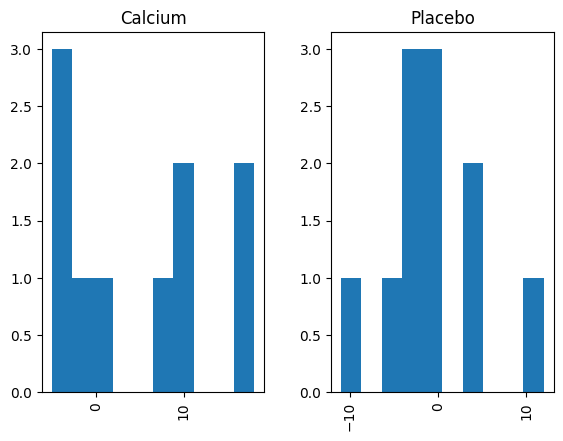

In [63]:
calcium_data.hist(column = 'Decrease', by = 'Treatment')

QQ plot

In [108]:
calcium_patients = calcium_data[calcium_data['Treatment'] == 'Calcium']
placebo_patients = calcium_data[calcium_data['Treatment'] == 'Placebo']
decrease_1 = calcium_patients[['Decrease']]
decrease_2 = placebo_patients[['Decrease']]

In [97]:
# sm.qqplot(decrease_1, line='q', marker='o')
# plt.title('Q-Q plot for Calcium')

# sm.qqplot(decrease_2, line='q', marker='o')
# plt.title('Q-Q plot for Placebo')


Text(0.5, 1.0, 'Q-Q plot for Placebo')

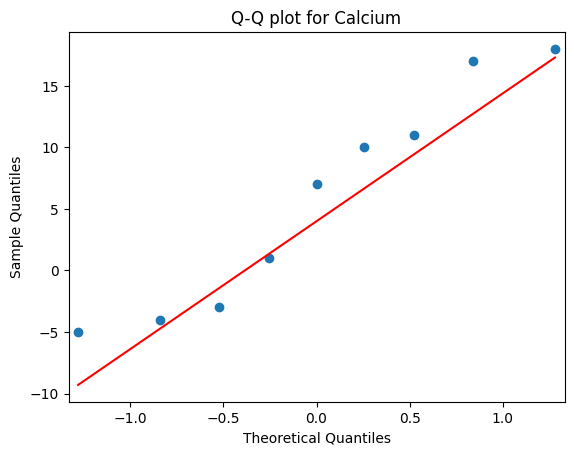

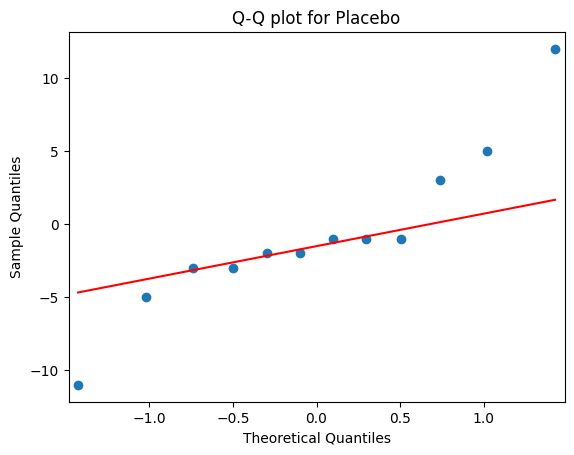

In [81]:
sm.qqplot(calcium_data['Decrease'].iloc[:10], line='q', marker='o')
plt.title('Q-Q plot for Calcium')

sm.qqplot(calcium_data['Decrease'].iloc[10:], line='q', marker='o')
plt.title('Q-Q plot for Placebo')


They are normally distrubted

### 3. Is the Variance the same

#### The following is a one way ANOVA but this is WRONG. We need to do a F-test or Levine (no normal distribution)

In [116]:
var_test_result = f_oneway(decrease_1, decrease_2)
var_test_result

F_onewayResult(statistic=array([3.06207498]), pvalue=array([0.09627287]))

P-value is above 5 % so we accept that the variances are the same

### 4. Visual comparison

<AxesSubplot: title={'center': 'Decrease'}, xlabel='Treatment'>

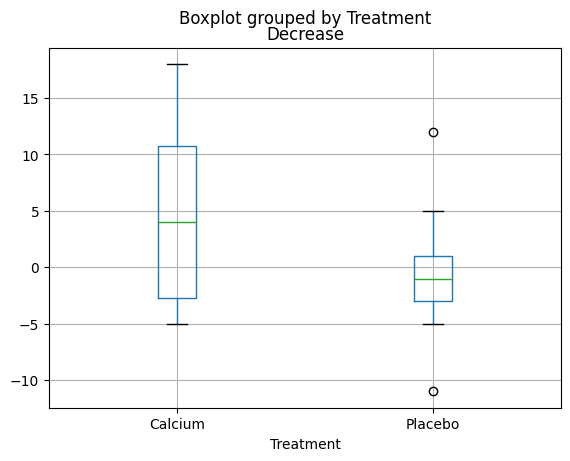

In [106]:
calcium_data.boxplot(column='Decrease', by='Treatment')

### 5. Difference in blood pressure

In [114]:
t_test_result = ttest_ind(decrease_1, decrease_2, equal_var=True)
t_test_result

TtestResult(statistic=array([1.74987856]), pvalue=array([0.09627287]), df=array([19.]))

P-value above 5 % again so we cannot accept the null hypothesis. We conclude no difference in blood pressure between the groups

### 6. Wilcoxon test

In [115]:
mannwhitneyu_test_result = mannwhitneyu(decrease_1, decrease_2)
mannwhitneyu_test_result

MannwhitneyuResult(statistic=array([71.]), pvalue=array([0.27349989]))

# Exercise 3 - Laborforce

### 1. Independent t-test

In [125]:
labor_data = pd.read_csv('labor.txt', delim_whitespace = True)
y_1972 = labor_data[['x1972']]
y_1968 = labor_data[['x1968']]
ttest_ind(y_1972, y_1968, equal_var=True)


TtestResult(statistic=array([1.49585162]), pvalue=array([0.14340825]), df=array([36.]))

### 2. Paired t-test

In [129]:
ttest_rel(y_1972, y_1968)

TtestResult(statistic=array([2.45770382]), pvalue=array([0.0243526]), df=array([18]))

### Conclusion

The paired t-test is the most suitable apporach which makes perfect sense (observations are from same sample, years apart)

# Exercise 4 - Log transformations

1. y vs log(x)

In [47]:
# plot x vs y
logx = np.linspace(1.5, 2.5, 100)
y = 3 * logx + np.random.normal(scale=0.15, size=100)
x = np.exp(logx)
# plt.scatter(x, y, label='Data') # Can try swapping the axes
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

Plotting y vs log(x)

In [53]:
# plt.scatter(logx, y, label='Data') # Can try swapping the axes
# plt.xlabel('log(x)')
# plt.ylabel('y')
# plt.legend()
# plt.show()

Fitting regression model

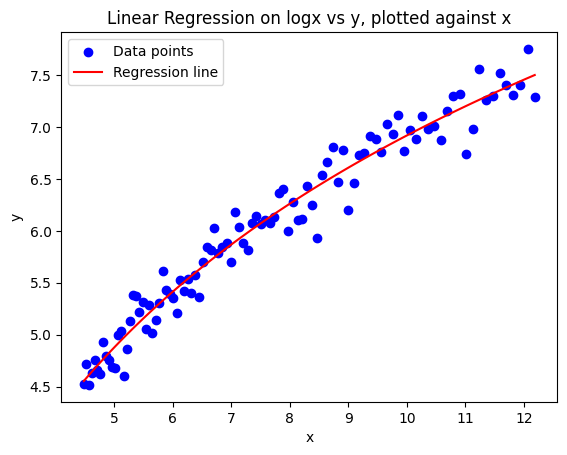

In [57]:
# Linear regression on y vs log(x)
logx_reshaped = logx.reshape(-1, 1)
model = lm.LinearRegression()
model.fit(logx_reshaped, y)

# Get the predicted values
y_pred = model.predict(logx_reshaped )

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression on logx vs y, plotted against x')
plt.show()

x vs y. We now this is wrong because there is only a linear relationship between y and log(x)

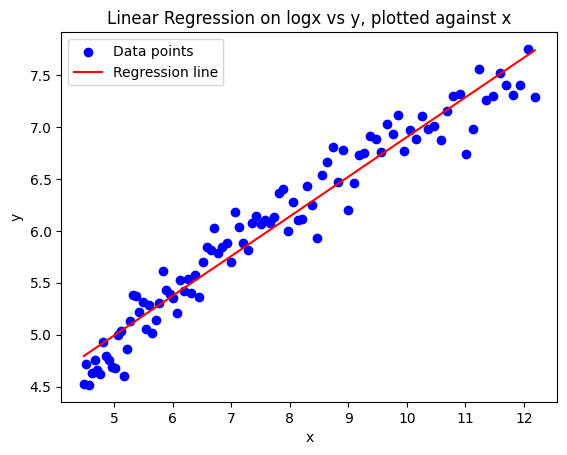

In [61]:
# Perform linear regression on x and y
x_reshaped = x.reshape(-1, 1)
model.fit(x_reshaped, y)
y2_pred = model.predict(x_reshaped)

# Calculate residuals
residuals = y - y2_pred

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y2_pred, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression on logx vs y, plotted against x')
plt.show()

In [ ]:
# Plot residual plot
# plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

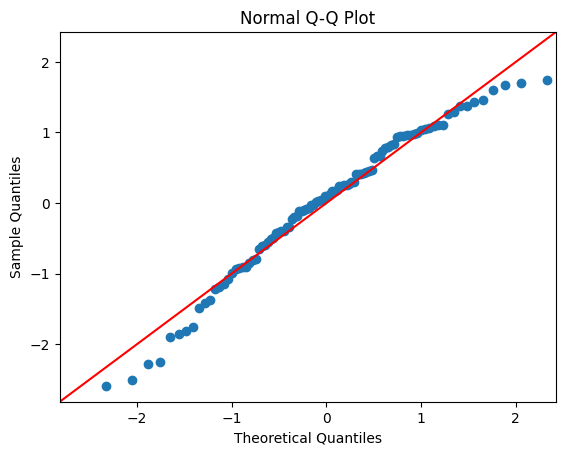

In [29]:
# QQ-plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()